In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
%matplotlib inline

In [2]:
df_airline= pd.read_csv('airline_passengers.csv')

In [3]:
df_airline.head(5)

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


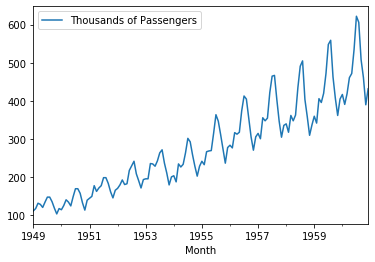

In [13]:
df_airline.plot()  #Seasonal Data

In [14]:
from statsmodels.tsa.stattools import adfuller

In [26]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against null hyposthesis , Reject Null hypothesis. data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, TIME series has a unit root")

In [27]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060569
p- value 0.9918802434376411
Weak evidence against null hypothesis, TIME series has a unit root


In [28]:
## USE DIFFERENCING TECHNIQUE

In [29]:
df_airline['Passengers first difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [30]:
df_airline.head()

,Thousands of Passengers,Passengers first difference,Passengers Second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,126.0
1949-04-01,129.0,-3.0,115.0
1949-05-01,121.0,-8.0,124.0


In [31]:
adf_test(df_airline['Passengers first difference'].dropna())

ADF Statistics: -2.8292668241699928
p- value 0.05421329028382636
Weak evidence against null hypothesis, TIME series has a unit root


In [32]:
## USE DIFFERENCING TECHNIQUE

In [33]:
df_airline['Passengers Second difference']=df_airline['Thousands of Passengers']-df_airline['Passengers first difference'].shift(1)

In [34]:
adf_test(df_airline['Passengers Second difference'].dropna())

ADF Statistics: 0.9411483016889888
p- value 0.9936044985593916
Weak evidence against null hypothesis, TIME series has a unit root


In [35]:
df_airline['Passengers Third difference']=df_airline['Thousands of Passengers']-df_airline['Passengers Second difference'].shift(1)

In [36]:
adf_test(df_airline['Passengers Third difference'].dropna())

ADF Statistics: -2.902243043948102
p- value 0.04508778304296284
Strong evidence against null hyposthesis , Reject Null hypothesis. data has no unit root and is stationary


In [38]:
##SEASONAL DATA HENCE FOR 12 MONTHS THE ADF TEST IS DONE
df_airline['Passengers 12M difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [39]:
adf_test(df_airline['Passengers 12M difference'].dropna())

ADF Statistics: -3.383020726492481
p- value 0.011551493085514952
Strong evidence against null hyposthesis , Reject Null hypothesis. data has no unit root and is stationary


In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

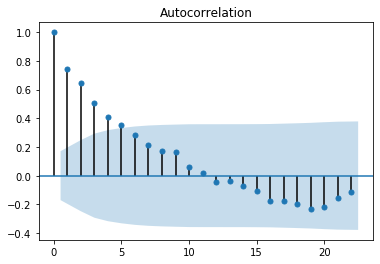

In [44]:
acf = plot_acf((df_airline['Passengers 12M difference'].dropna()))

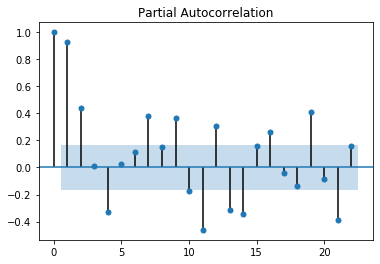

In [43]:
result = plot_pacf(df_airline['Passengers Second difference'].dropna())

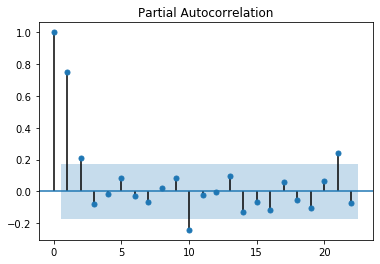

In [45]:
result = plot_pacf(df_airline['Passengers 12M difference'].dropna())

In [46]:
df_airline

,Thousands of Passengers,Passengers first difference,Passengers Second difference,Passengers Third difference,Passengers 12M difference
Month,,,,,
1949-01-01,112.0,NaN,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN,NaN
1949-03-01,132.0,14.0,126.0,NaN,NaN
1949-04-01,129.0,-3.0,115.0,3.0,NaN
1949-05-01,121.0,-8.0,124.0,6.0,NaN
...,...,...,...,...,...
1960-08-01,606.0,-16.0,519.0,47.0,47.0
1960-09-01,508.0,-98.0,524.0,-11.0,45.0
1960-10-01,461.0,-47.0,559.0,-63.0,54.0


In [47]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [48]:
train_data = df_airline[:train_dataset_end]
test_data= df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [49]:
##Prediction

In [50]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [51]:
test_data

,Thousands of Passengers,Passengers first difference,Passengers Second difference,Passengers Third difference,Passengers 12M difference
Month,,,,,
1956-01-01,284.0,6.0,243.0,-31.0,42.0
1956-02-01,277.0,-7.0,271.0,34.0,44.0
1956-03-01,317.0,40.0,324.0,46.0,50.0
1956-04-01,313.0,-4.0,273.0,-11.0,44.0
1956-05-01,318.0,5.0,322.0,45.0,48.0
1956-06-01,374.0,56.0,369.0,52.0,59.0
1956-07-01,413.0,39.0,357.0,44.0,49.0
1956-08-01,405.0,-8.0,366.0,48.0,58.0
1956-09-01,355.0,-50.0,363.0,-11.0,43.0


In [52]:
##CREATE A ARIMA MODEL

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [54]:
train_data

,Thousands of Passengers,Passengers first difference,Passengers Second difference,Passengers Third difference,Passengers 12M difference
Month,,,,,
1949-01-01,112.0,NaN,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN,NaN
1949-03-01,132.0,14.0,126.0,NaN,NaN
1949-04-01,129.0,-3.0,115.0,3.0,NaN
1949-05-01,121.0,-8.0,124.0,6.0,NaN
...,...,...,...,...,...
1955-08-01,347.0,-17.0,298.0,28.0,54.0
1955-09-01,312.0,-35.0,329.0,14.0,53.0
1955-10-01,274.0,-38.0,309.0,-55.0,45.0


In [59]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

C:\Users\LAPTOP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\LAPTOP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [60]:
model_ARIMA_fit = model_ARIMA.fit()

In [61]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                               css-mle   S.D. of innovations             18.333
Date:                        Tue, 27 Sep 2022   AIC                            738.477
Time:                                23:53:58   BIC                            767.358
Sample:                            03-01-1949   HQIC                           750.072
                                 - 12-01-1955                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0164      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.Thousands of Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Thousands of Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Thousands of Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Thousands of Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Thousands of Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Thousands of Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.Thousands of Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.Thousands of Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Thousands of Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.Thousands of Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [62]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [64]:
pred = model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred

In [65]:
residuals

Month
1956-01-01    302.695975
1956-02-01    289.830793
1956-03-01    319.329671
1956-04-01    328.562173
1956-05-01    298.689309
1956-06-01    354.352089
1956-07-01    426.271459
1956-08-01    441.529627
1956-09-01    350.001329
1956-10-01    315.913222
1956-11-01    242.711495
1956-12-01    281.647803
1957-01-01    333.119975
1957-02-01    304.741458
1957-03-01    367.652384
1957-04-01    343.198152
1957-05-01    343.325747
1957-06-01    413.019349
1957-07-01    483.932095
1957-08-01    477.557307
1957-09-01    403.265268
1957-10-01    346.226375
1957-11-01    281.802348
1957-12-01    337.112083
1958-01-01    347.244796
1958-02-01    325.413854
1958-03-01    364.318087
1958-04-01    341.830111
1958-05-01    355.290669
1958-06-01    435.056479
1958-07-01    504.184593
1958-08-01    505.771332
1958-09-01    405.976045
1958-10-01    350.193226
1958-11-01    301.548559
1958-12-01    341.117857
1959-01-01    364.677796
1959-02-01    347.031467
1959-03-01    403.339729
1959-04-01    392.1

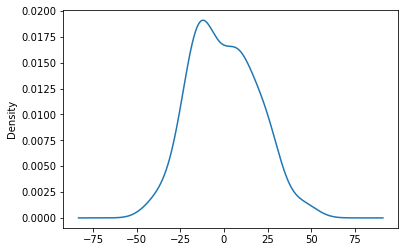

In [66]:
model_ARIMA_fit.resid.plot(kind='kde')

In [67]:
test_data['Predicted_ARIMA'] = pred

C:\Users\LAPTOP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


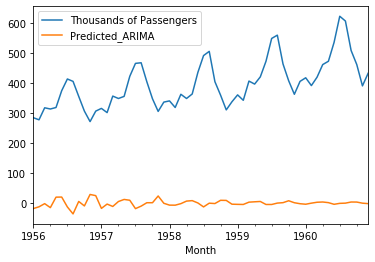

In [68]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
model_SARIMA = SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(1,1,1,12))

C:\Users\LAPTOP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\LAPTOP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [71]:
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\LAPTOP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [72]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 1, [1], 12)   Log Likelihood                -263.916
Date:                              Wed, 28 Sep 2022   AIC                            549.831
Time:                                      00:10:05   BIC                            574.875
Sample:                                  01-01-1949   HQIC                           559.801
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5536      3.394      0.163      0.870      -6.098       7.206
ar.L2          0.8508      0.385      2.212      0.027       0.097       1.605
ar.L3         -0.4154      3.089     -0.135      0.893      -6.469       5.638
ma.L1          0.2090      3.309      0.063      0.950      -6.277       6.695
ma.L2         -0.5088      2.436     -0.209      0.835      -5.284       4.266
ma.L3         -0.0927      0.696     -0.133      0.894      -1.458       1.272
ma.L4         -0.1906      0.538     -0.354      0.723      -1.246       0.865
ma.L5          0.1649      0.927      0.178      0.859      -1.653       1.982
ar.S.L12      -0.3163      0.856     -0.370      0.712      -1.993       1.361
ma.S.L12       0.1072      0.943      0.114      0.909      -1.740       1.955
sigma2        84.1544     29.609      2.842      0.004      26.122     142.187
===================================================================================
Ljung-Box (Q):                       23.90   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.98   Prob(JB):                         0.39
Heteroskedasticity (H):               2.41   Skew:                             0.39
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
##prediction

In [74]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [79]:
pred_Sarima = model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals = test_data['Thousands of Passengers']-pred_Sarima

In [80]:
residuals

1956-01-01           NaN
1956-02-01           NaN
1956-03-01           NaN
1956-04-01           NaN
1956-05-01           NaN
1956-06-01           NaN
1956-07-01     14.056728
1956-08-01     22.108915
1956-09-01      7.512657
1956-10-01     -4.710648
1956-11-01     -4.548624
1956-12-01     -7.132494
1957-01-01     -4.584424
1957-02-01    -11.745250
1957-03-01     11.769433
1957-04-01      3.829458
1957-05-01      9.791715
1957-06-01     34.298929
1957-07-01     30.653453
1957-08-01     49.451425
1957-09-01     22.278700
1957-10-01      2.889039
1957-11-01     -2.836487
1957-12-01    -10.056058
1958-01-01    -11.588245
1958-02-01    -26.571582
1958-03-01    -13.689504
1958-04-01    -27.084640
1958-05-01    -12.921189
1958-06-01     17.181424
1958-07-01     27.081854
1958-08-01     58.070095
1958-09-01     -6.783487
1958-10-01    -14.017112
1958-11-01    -26.653715
1958-12-01    -37.259247
1959-01-01    -19.653100
1959-02-01    -30.286740
1959-03-01      2.897484
1959-04-01     -6.271448


In [81]:
test_data['Predicted_Sarima'] = pred_Sarima

C:\Users\LAPTOP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


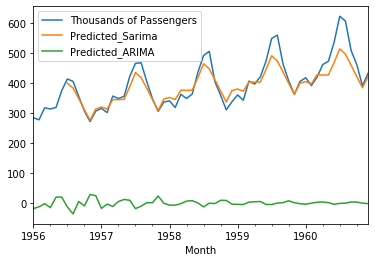

In [82]:
test_data[['Thousands of Passengers','Predicted_Sarima','Predicted_ARIMA']].plot()